In [3]:
import os
import numpy as np

import matplotlib
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import sys
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\py_functions')
import seaborn as sns

import pandas as pd
import basic_func as bf

## AUC

In [306]:
subjs = ["EL004","EL005","EL011","EL015", "EL010",  "EL016", "El014"]

In [5]:
folder = 'PairedPulse'
cond_folder = 'CR'

In [43]:
H_data

,Area,Stim_L,Stim,Int,IPI,H_n,H,Block,Hour,SleepState,Date,Sleep
0,Dorsofrontal,L_SFS66,65.0,4.0,1600.0,2.266686,6.113092,1.0,16.0,Wake,20220215.0,0.0
1,Dorsofrontal,L_SFS66,65.0,4.0,43.1,0.938763,2.531779,1.0,16.0,Wake,20220215.0,0.0
2,Dorsofrontal,L_SFS66,65.0,4.0,15.1,0.000000,0.000000,1.0,16.0,Wake,20220215.0,0.0
3,Dorsofrontal,L_SFS66,65.0,1.0,497.2,1.755493,4.734441,1.0,16.0,Wake,20220215.0,0.0
4,Dorsofrontal,L_SFS66,65.0,2.0,43.1,0.515298,1.389721,1.0,16.0,Wake,20220215.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Dorsofrontal,L_SFS66,65.0,2.0,15.1,1.037671,2.798525,69.0,14.0,Wake,20220218.0,0.0
4913,Dorsofrontal,L_SFS66,65.0,1.0,86.7,0.954693,2.574741,69.0,14.0,Wake,20220218.0,0.0
4914,Dorsofrontal,L_SFS66,65.0,4.0,25.5,1.396890,3.767316,69.0,14.0,Wake,20220218.0,0.0
4915,Dorsofrontal,L_SFS66,65.0,2.0,43.1,1.245552,3.359167,69.0,14.0,Wake,20220218.0,0.0


In [47]:
H_data

,Area,Stim_L,Stim,Int,IPI,Block,Hour,SleepState,Date,Sleep,H1,H2,H3
0,Dorsofrontal,L_SFS66,65.0,4.0,1600.0,1.0,16.0,Wake,20220215.0,0.0,2.214497,6.113092,0.000000
1,Dorsofrontal,L_SFS66,65.0,4.0,43.1,1.0,16.0,Wake,20220215.0,0.0,0.892810,2.531779,1.405777
2,Dorsofrontal,L_SFS66,65.0,4.0,15.1,1.0,16.0,Wake,20220215.0,0.0,6.281661,0.000000,1.880944
3,Dorsofrontal,L_SFS66,65.0,1.0,497.2,1.0,16.0,Wake,20220215.0,0.0,1.821359,4.734441,0.816050
4,Dorsofrontal,L_SFS66,65.0,2.0,43.1,1.0,16.0,Wake,20220215.0,0.0,1.342818,1.389721,2.605448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,Dorsofrontal,L_SFS66,65.0,2.0,15.1,69.0,14.0,Wake,20220218.0,0.0,2.139210,2.798525,1.315990
4913,Dorsofrontal,L_SFS66,65.0,1.0,86.7,69.0,14.0,Wake,20220218.0,0.0,2.146006,2.574741,1.946412
4914,Dorsofrontal,L_SFS66,65.0,4.0,25.5,69.0,14.0,Wake,20220218.0,0.0,1.479539,3.767316,0.963168
4915,Dorsofrontal,L_SFS66,65.0,2.0,43.1,69.0,14.0,Wake,20220218.0,0.0,0.089668,3.359167,2.192167


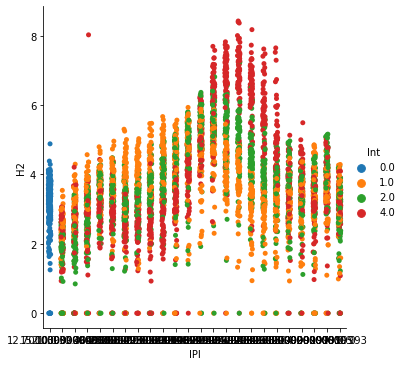

In [55]:
g = sns.catplot(x='IPI', y='H2', data=H_data, hue='Int')
#g.set_xscale('log')

In [ ]:
g = sns.lineplot(x='IPI', y='H_n',hue='Int', data= H_data[(H_data.SleepState=='Wake')&(H_data.H>0)])
g.set_xscale('log')

In [10]:
path_Stim_chans

['R_HippSub-61', 'R_PostCS_inf-6', 'R_PreCS_inf_mid-50', 'R_SubCG-28']

In [18]:
import glob

In [57]:
subj = 'EL011'
path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment' 
path_patient_analysis = 'Y:\eLab\Projects\EL_experiment\Analysis\Patients\\'+subj
sep =';'  

path_infos = os.path.join(path_patient, 'infos')
if not os.path.exists(path_infos):
    path_infos = path_gen + '\\infos'
nmf_path_all = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF_Stim\\' 
stimlist = pd.read_csv(path_patient_analysis+'/BrainMapping/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)
# data
path_Stim_chans = os.listdir(nmf_path_all)
start = 0
stim_folder = path_Stim_chans[3]
#for stim_folder in path_Stim_chans[:4]:
nmf_path = os.path.join(nmf_path_all,stim_folder)

H_data  = pd.read_csv(glob.glob(nmf_path + '\\PP_CR_1rk*.csv')[0])

In [58]:
H_data.insert(5,'H',H_data.H2)
H_data = H_data.drop(columns=['H1', 'H2','H3'])
H_data.insert(5, 'H_n',H_data.H )

In [97]:
for ss in np.unique(H_data.SleepState):
    sp_mean = np.nanmean(H_data.loc[(H_data.Int==0)&(H_data.SleepState==ss)&(H_data.H>0), 'H'])
    sp_st = np.nanstd(H_data.loc[(H_data.Int==0)&(H_data.SleepState==ss)&(H_data.H>0), 'H'])
    
    #H_data.loc[H_data.SleepState==ss, 'H_n'] = (H_data.loc[H_data.SleepState==ss, 'H']-sp_mean)/sp_st
    H_data.loc[H_data.SleepState==ss, 'H_n'] = H_data.loc[H_data.SleepState==ss, 'H']/sp_mean
    print(ss,', 5%: ', np.percentile((H_data.loc[(H_data.Int==0)&(H_data.SleepState==ss)&(H_data.H>0), 'H_n']),25))
    print(ss, ', 95%: ', np.percentile((H_data.loc[(H_data.Int==0)&(H_data.SleepState==ss)&(H_data.H>0), 'H_n']),75))

NREM , 5%:  0.8267808861924445
NREM , 95%:  1.1630387510933082
REM , 5%:  0.9484140250806421
REM , 95%:  1.0405660743516123
Wake , 5%:  0.9244972220646801
Wake , 95%:  1.108948886982169


In [100]:
sp_mean

3.343929628384001

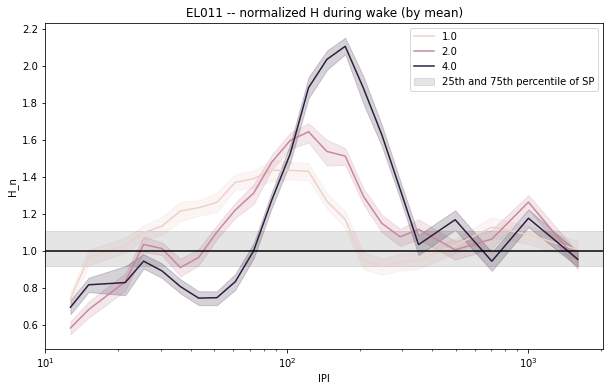

In [98]:
fig = plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:white')
plt.title(subj+' -- normalized H during wake (by mean)')
g = sns.lineplot(x='IPI', y='H_n',hue='Int', data= H_data[(H_data.SleepState=='Wake')&(H_data.Int>0)&(H_data.H>0)])
g.set_xscale('log')
plt.axhline(1, color=[0,0,0])
plt.axhspan(0.92,1.108, alpha=0.1,color=[0,0,0], label='25th and 75th percentile of SP')
#plt.axhline(0, color=[0,0,0])
#plt.axhspan(-0.44,0.64, alpha=0.1,color=[0,0,0], label='25th and 75th percentile of SP')
plt.legend()
plt.show()

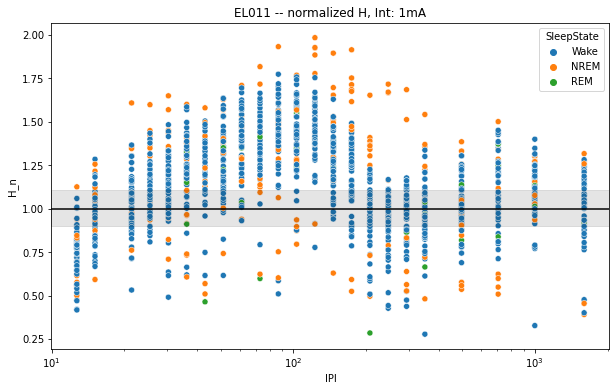

In [79]:
Int = 1
fig = plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:white')
plt.title(subj+' -- normalized H, Int: '+str(Int)+'mA')
g = sns.scatterplot(x='IPI', y='H_n',hue='SleepState', data= H_data[(H_data.Int==Int)&(H_data.H>0)])
g.set_xscale('log')
plt.axhline(1, color=[0,0,0])
plt.axhspan(0.9,1.11, alpha=0.1,color=[0,0,0])

plt.show()

In [307]:
for subj in subjs:
    print(subj)
    AUC_ss = get_subnetwork_Stim(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState')

EL004
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL004\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL005
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL005\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL011
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL011\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL015
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL015\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL010
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL010\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
EL016
Y:\eLab\Projects\EL_experiment\Analysis\Patients\EL016\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----
El014
Y:\eLab\Projects\EL_experiment\Analysis\Patients\El014\InputOutput\CR\NNMF_Stim\summary.csv ------ saved ----


In [325]:
AUC_all.insert(1,'StimR', 'test')
for i in range(len(regions)): # , area in zip([regions.label, regions.area]):
    ll = regions.label.values[i]
    area = regions.area.values[i]
    AUC_all.loc[AUC_all.Stim_A==ll, 'StimR'] =area

In [ ]:
subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment' 
        path_patient_analysis = 'Y:\eLab\Projects\EL_experiment\Analysis\Patients\\'+subj

        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'

In [323]:
def get_subnetwork_across_Stim(subjs, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    for i in range(len(subjs)):
        print('loading -- '+subjs[i], end='\r')
        subj = subjs[i]
        path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
        if not os.path.exists(path_gen):
            path_gen = 'T:\\EL_experiment\\Patients\\' + subj
        path_patient = path_gen + '\Data\EL_experiment' 
        path_infos = os.path.join(path_patient, 'infos')
        if not os.path.exists(path_infos):
            path_infos = path_gen + '\\infos'
        path_patient_analysis = 'Y:\eLab\Projects\EL_experiment\Analysis\Patients\\'+subj
        nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF_Stim\\' 
        file = os.path.join(nmf_path, 'summary.csv')

        AUC_ss = pd.read_csv(file)
        
        # labels
        stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
        lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
        labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
            stimlist,
            lbls)

        AUC_ss.insert(0, 'Subj', subjs[i])
        AUC_ss.insert(1, 'Stim_A', subjs[i])
        for sc in range(len(labels_all)):
            AUC_ss.loc[(AUC_ss.Stim==sc), 'Stim_A'] =labels_region[sc]
        
        for Hs in AUC_ss.H:
            for sc in AUC_ss.Stim:
                mn = np.mean(AUC_ss.loc[(AUC_ss.SleepState=='Wake')&(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC'])
                AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUCn'] = AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC']/mn
            
        if i==0:
            data_con    = AUC_ss
        else:
            data_con = pd.concat([data_con, AUC_ss])   
    return data_con

In [305]:
def get_subnetwork_Stim(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment' 
    path_patient_analysis = 'Y:\eLab\Projects\EL_experiment\Analysis\Patients\\'+subj
    sep =';'  

    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'
    nmf_path_all = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF_Stim\\' 
    stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
    lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    # data
    path_Stim_chans = os.listdir(nmf_path_all)
    start = 0
    for stim_folder in path_Stim_chans[:4]:
        nmf_path = os.path.join(nmf_path_all,stim_folder)
        asso = pd.read_csv(glob.glob(nmf_path + '\\IO_association_1rk*.csv')[0])
        rk =  glob.glob(nmf_path + '\\IO_association_1rk*.csv')[0][-5:-4]
        W = pd.read_csv(glob.glob(nmf_path + '\\W_1rk'+rk+'.csv')[0])
        NMR_con = pd.read_csv(glob.glob(nmf_path + '\\IO_CR_1rk'+rk+'.csv')[0])
        
        AUC_ss = pd.read_csv(glob.glob(nmf_path + '\\IO_' + cond + '_AUC_1rk'+rk+'.csv')[0])
    
        # get responsive channels
        W_col = []
        H_col = []
        for i in range(W.shape[1]-1):
            W_col.append('W' + str(i + 1))
            H_col.append('H' + str(i + 1))

        W_clusters = np.zeros((W.shape[1]-1,W.shape[0]))
        i = 0
        for w_str in W_col:
            W_sel = W[w_str].values
            kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(W_sel.reshape(-1, 1))
            if np.mean(W_sel[kmeans.labels_==0])<np.mean(W_sel[kmeans.labels_==1]):
                W_clusters[i,kmeans.labels_==1] = 1
            else:
                W_clusters[i,kmeans.labels_==0] = 1
            i = i+1
        sc = int(AUC_ss.Stim.values[0])
        dat = AUC_ss[AUC_ss.Stim == sc]
        for Hs in np.unique(asso['H_num']):
            w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
            dists = np.zeros((len(w_chans),))
            for i in range(len(w_chans)):
                dists[i] = np.round(
                    distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.nanmean(dists)
            if np.mean(dists)<30:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
            else:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'
        if start ==0:
            AUC_ss_all = AUC_ss
            start = 1
        else:
            AUC_ss_all = pd.concat([AUC_ss_all, AUC_ss])
            

    file = os.path.join(nmf_path_all, 'summary.csv')
    AUC_ss_all.to_csv(file, index=False, header=True)
    print(file+' ------ saved ----')
    return AUC_ss_all

In [331]:
g = sns.catplot(x='StimR', y='AUCn', hue='SleepState', data=data_con, kind='box', col = 'dist_group', height=6,aspect=2)
plt.suptitle(m+' subnetworks across patients, n='+str(len(subjs)), fontsize=20)


ValueError: Could not interpret input 'AUCn'

In [3]:
def get_subnetwork_across(subjs, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    for i in range(len(subjs)):
        print('loading -- '+subjs[i], end='\r')
        subj = subjs[i]
        path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
        path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj


        nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
        file = nmf_path + 'summary.csv'
        AUC_ss = pd.read_csv(file)
        AUC_ss.insert(0, 'Subj', subjs[i])
        
        for Hs in AUC_ss.H:
            for sc in AUC_ss.Stim:
                mn = np.mean(AUC_ss.loc[(AUC_ss.SleepState=='Wake_M')&(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC'])
                AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUCn'] = AUC_ss.loc[(AUC_ss.H==Hs)&(AUC_ss.Stim==sc), 'AUC']/mn
            
        if i==0:
            data_con    = AUC_ss
        else:
            data_con = pd.concat([data_con, AUC_ss])   
    return data_con

In [10]:
NNMF_ass = np.zeros((1, 4))
Int_all = np.unique(data.Int)
Stims = np.unique(data.Stim)
s = 0


In [14]:
asso

,Stim,AUC,H,H_num,threshold
0,5.0,26.380126,H4,4.0,5.074135
1,27.0,20.597872,H6,6.0,7.406414
2,49.0,21.351900,H1,1.0,3.156048
3,60.0,23.554087,H2,2.0,1.871056


In [16]:
import random

In [18]:
auc_test

26.380126447292938

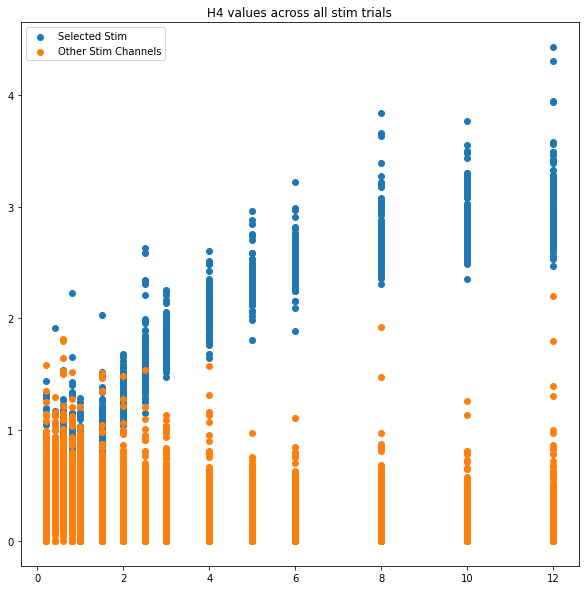

In [29]:
plt.figure(figsize=(10,10))
plt.title('H4 values across all stim trials')
plt.scatter(x='Int', y='H4', data=con_nmf_test, label='Selected Stim')
plt.scatter(x='Int', y='H4', data=con_nmf_surr, label='Other Stim Channels')
plt.legend()

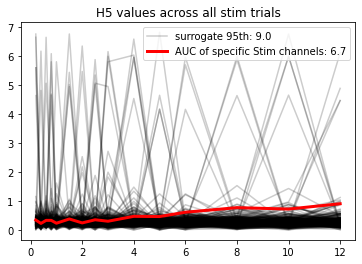

In [80]:
sc = Stims[0]
con_nmf_test = data[data.Stim == sc]
con_nmf_surr = data[data.Stim != sc]
h = 5
Hs = 'H'+str(h)
con_nmf_test_sum = con_nmf_test.groupby(['Stim', 'Int'])[Hs].mean()

auc_test = np.trapz(con_nmf_test_sum.values, np.unique(con_nmf_test.Int))
surr = np.zeros((300,))
plt.title(Hs+' values across all stim trials')
for i in range(len(surr)):
    h_sur = random.choices(con_nmf_surr[Hs].values, k=len(np.unique(con_nmf_test.Int)))
    surr[i] = np.trapz(h_sur,
                       np.unique(con_nmf_test.Int))
    plt.plot(Int, h_sur, color=[0,0,0], alpha=0.2)
plt.plot(Int, h_sur, color=[0,0,0], alpha=0.2, label='surrogate 95th: '+str(np.round(np.percentile(surr, 95),1)))
plt.plot(Int, con_nmf_test_sum.values, label='AUC of specific Stim channels: '+str(np.round(auc_test,1)), color=[1,0,0], linewidth=3)
plt.legend()


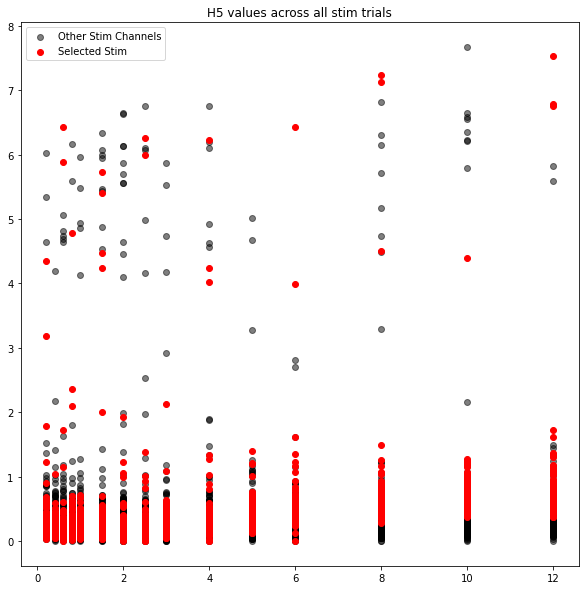

In [81]:
plt.figure(figsize=(10,10))
plt.title(Hs+' values across all stim trials')

plt.scatter(x='Int', y=Hs, data=con_nmf_surr, label='Other Stim Channels',color=[0,0,0], alpha=0.5)
plt.scatter(x='Int', y=Hs, data=con_nmf_test, label='Selected Stim', color=[1,0,0])
plt.legend()

In [9]:
data = NMR_con

In [7]:
subj = 'EL004'
metric='LL'
folder='InputOutput'
cond_folder='CR'
cond = 'SleepState'
    
path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj

sep =';'  
nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
lbls = pd.read_excel(path_patient + "\\infos\\" + subj + "_labels.xlsx", header=0, sheet_name='BP')
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)
# data
W = pd.read_csv(glob.glob(nmf_path + 'W_1rk*.csv')[0])
NMR_con = pd.read_csv(glob.glob(nmf_path + 'IO_CR_1rk*.csv')[0])
asso = pd.read_csv(glob.glob(nmf_path + 'IO_association_1rk*.csv')[0])
AUC_ss = pd.read_csv(glob.glob(nmf_path + 'IO_' + cond + '_AUC_1rk*.csv')[0])

In [4]:
def get_subnetwork(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState'):
    path_patient_analysis = 'T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\\'+subj
    path_patient    = 'T:\EL_experiment\Patients\\'+subj+'\Data\EL_experiment' # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj

    sep =';'  
    nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'
    stimlist = pd.read_csv(path_patient_analysis+'/InputOutput/' + cond_folder + '/data/stimlist_' + cond_folder + '.csv')
    lbls = pd.read_excel(path_patient + "\\infos\\" + subj + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
        stimlist,
        lbls)
    # data
    W = pd.read_csv(glob.glob(nmf_path + 'W_1rk*.csv')[0])
    NMR_con = pd.read_csv(glob.glob(nmf_path + 'IO_CR_1rk*.csv')[0])
    asso = pd.read_csv(glob.glob(nmf_path + 'IO_association_1rk*.csv')[0])
    AUC_ss = pd.read_csv(glob.glob(nmf_path + 'IO_' + cond + '_AUC_1rk*.csv')[0])
    
    # get responsive channels
    W_col = []
    H_col = []
    for i in range(W.shape[1]-1):
        W_col.append('W' + str(i + 1))
        H_col.append('H' + str(i + 1))

    W_clusters = np.zeros((W.shape[1]-1,W.shape[0]))
    i = 0
    for w_str in W_col:
        W_sel = W[w_str].values
        kmeans = sklearn.cluster.KMeans(n_clusters=2, random_state=0).fit(W_sel.reshape(-1, 1))
        if np.mean(W_sel[kmeans.labels_==0])<np.mean(W_sel[kmeans.labels_==1]):
            W_clusters[i,kmeans.labels_==1] = 1
        else:
            W_clusters[i,kmeans.labels_==0] = 1
        i = i+1
    ## 
    Stims = np.unique(asso.Stim)
    for sc in Stims.astype('int'):
        dat = AUC_ss[AUC_ss.Stim == sc]
        for Hs in np.unique(asso.loc[asso.Stim == sc, 'H_num']):
            w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
            dists = np.zeros((len(w_chans),))
            for i in range(len(w_chans)):
                dists[i] = np.round(
                    distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.mean(dists)
            if np.mean(dists)<30:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
            else:
                AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'

    file = nmf_path + 'summary.csv'
    AUC_ss.to_csv(file, index=False, header=True)
    print(file+' ------ saved ----')
    return AUC_ss

In [131]:
AUC_ss2 = get_subnetwork(subj, metric='LL', folder='InputOutput', cond_folder='CR',cond = 'SleepState')

T:\EL_experiment\Projects\EL_experiment\Analysis\Patients\EL011\InputOutput\CR\NNMF\LL/summary.csv ------ saved ----


In [3]:
metric='LL'
folder = 'InputOutput'
cond_folder ='CR'

In [4]:
nmf_path = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\NNMF\\' + metric + '/'

## ACROSS

In [120]:

Stims = np.unique(asso.Stim)
for sc in Stims.astype('int'):
    dat = AUC_ss[AUC_ss.Stim == sc]
    for Hs in np.unique(asso.loc[asso.Stim == sc, 'H_num']):
        w_chans = np.where(W_clusters[(Hs-1).astype('int'),:]==1)[0]
        dists = np.zeros((len(w_chans),))
        for i in range(len(w_chans)):
            dists[i] = np.round(
                distance.euclidean(coord_all[sc], coord_all[w_chans[i]]), 2)
        AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'n_con'] =len(w_chans)
        AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'mean_dist'] =np.mean(dists)
        if np.mean(dists)<30:
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'local'
        else:
            AUC_ss.loc[(AUC_ss.Stim==sc)&(AUC_ss.H==Hs), 'dist_group'] = 'distant'

In [148]:
data_con

,Subj,Area,Stim_L,Stim,H,SleepState,AUC,Pearson,N_trial,n_con,mean_dist,dist_group
0,EL011,Basotemporal,L_ENT8,7.0,1.0,NREM,0.726920,1.0,487.0,9.0,15.683333,local
1,EL011,Basotemporal,L_ENT8,7.0,1.0,REM,0.713781,1.0,149.0,9.0,15.683333,local
2,EL011,Basotemporal,L_ENT8,7.0,1.0,Wake_A,0.874793,1.0,621.0,9.0,15.683333,local
3,EL011,Basotemporal,L_ENT8,7.0,1.0,Wake_M,0.825676,1.0,732.0,9.0,15.683333,local
4,EL011,Basotemporal,L_ENT8,7.0,1.0,Wake_N,0.822525,1.0,909.0,9.0,15.683333,local
...,...,...,...,...,...,...,...,...,...,...,...,...
25,El014,Laterotemporal,STS54,53.0,7.0,NREM,0.365580,1.0,239.0,4.0,62.142500,distant
26,El014,Laterotemporal,STS54,53.0,7.0,REM,0.386997,1.0,30.0,4.0,62.142500,distant
27,El014,Laterotemporal,STS54,53.0,7.0,Wake_A,0.398204,1.0,383.0,4.0,62.142500,distant
28,El014,Laterotemporal,STS54,53.0,7.0,Wake_M,0.401075,1.0,310.0,4.0,62.142500,distant


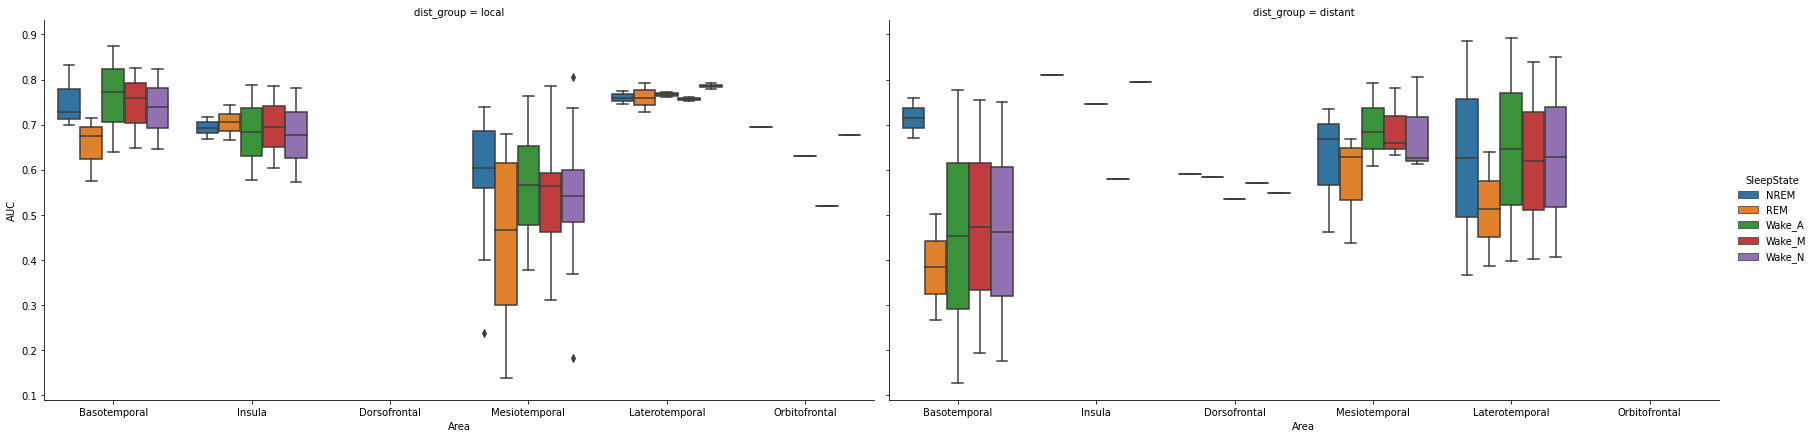

In [37]:
sc = 10

In [41]:
if not 'SleepState' in con_trial_Ph:
    # con_trial= con_trial[con_trial.d>0]
    con_trial_Ph.insert(5, 'SleepState', 'Wake_M')
    con_trial_Ph.loc[(con_trial_Ph.Sleep > 0) & (con_trial.Sleep < 4), 'SleepState'] = 'NREM'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 4), 'SleepState'] = 'REM'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & (con_trial_Ph.Hour >= 9) & (con_trial_Ph.Hour < 15), 'SleepState'] = 'Wake_M'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & (con_trial_Ph.Hour >= 15) & (con_trial_Ph.Hour < 21), 'SleepState'] = 'Wake_A'
    con_trial_Ph.loc[(con_trial_Ph.Sleep == 0) & ((con_trial_Ph.Hour < 9) | (con_trial_Ph.Hour >= 21)), 'SleepState'] = 'Wake_N'
sleepstate_labels = np.unique(con_trial_Ph['SleepState'])[::-1]

In [49]:
file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/IO_'+condition+'_AUC_LLpeak_1*.csv')[0]

data_A    = pd.read_csv(file)
data_A.insert(0, 'Subj', subj)

In [130]:
subjs = ["EL004","EL005", "EL010", "EL011", "EL014", "EL015"] # , "EL013", "EL012"
cond_folder  ='CR'
condition = 'SleepState' #sleep
## NMF AUC
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # load connections
    file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/LL/IO_'+condition+'_AUC_1*.csv')[0]
    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    data_A.insert(5, 'AUCn', data_A.AUC)
    for Hs in data_A.H:
        for sc in data_A.Stim:
            mn = np.mean(data_A.loc[(data_A.SleepState=='Wake_M')&(data_A.H==Hs)&(data_A.Stim==sc), 'AUC'])
            data_A.loc[(data_A.H==Hs)&(data_A.Stim==sc), 'AUCn'] = data_A.loc[(data_A.H==Hs)&(data_A.Stim==sc), 'AUC']/mn
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   
#data_con.insert(5,'AUCn',data_con.AUC)
data_con = data_con.reset_index(drop=True)
#data_con.AUCn = data_con.groupby(['Subj', 'Stim', 'H'])['AUC'].transform(lambda x: (x / x.mean()))
#sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='swarm')

In [131]:
data_con.loc[(data_con.Stim==7)&(data_con.Subj=='EL011'),'Area'] = 'Mesiotemporal'
data_con.loc[(data_con.Stim==36)&(data_con.Subj=='EL015'),'Area'] = 'Mesiotemporal'

In [148]:
data_con.loc[(data_con.Subj=='EL010')&(data_con.Stim==53)&(data_con.H!=3), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL011')&(data_con.Stim==7)&(data_con.H!=3), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==11)&(data_con.H!=4), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==44)&(data_con.H>7), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==36)&(data_con.H!=1), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==56)&(data_con.H!=2), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==19)&(data_con.H!=5), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL015')&(data_con.Stim==11)&(data_con.H!=6), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL005')&(data_con.Stim==33)&(data_con.H!=6), 'Pearson'] =-1
data_con = data_con[data_con.Pearson>0]


In [149]:
data_plot = data_con[data_con.Area=='Mesiotemporal']
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]

In [151]:
from scipy.stats import wilcoxon

w, p = wilcoxon(data_plot.loc[data_plot.SleepState=='NREM', 'AUC'], data_plot.loc[data_plot.SleepState=='Wake_N', 'AUC'])
p

0.0068359375

In [106]:
from mycolorpy import colorlist as mcp

In [162]:
areas = np.unique(data_con.Area)
areas

array(['Central', 'Dorsofrontal', 'Insula', 'Laterotemporal',
       'Mesiotemporal', 'Orbitofrontal', 'Superotemporal'], dtype=object)

In [168]:
data_con

,Subj,Area,Stim_L,Stim,H,AUCn,SleepState,AUC,Pearson,N_trial
0,EL004,Central,R_PostCS_inf-6,5.0,2.0,0.969225,NREM,0.647343,1.0,431.0
1,EL004,Central,R_PostCS_inf-6,5.0,2.0,0.970093,REM,0.647922,1.0,165.0
2,EL004,Central,R_PostCS_inf-6,5.0,2.0,0.994548,Wake_A,0.664256,1.0,450.0
3,EL004,Central,R_PostCS_inf-6,5.0,2.0,1.000000,Wake_M,0.667897,1.0,283.0
4,EL004,Central,R_PostCS_inf-6,5.0,2.0,1.003515,Wake_N,0.670245,1.0,472.0
...,...,...,...,...,...,...,...,...,...,...
195,EL015,Mesiotemporal,HIPP_ant57,56.0,2.0,1.524651,NREM,0.695712,1.0,573.0
196,EL015,Mesiotemporal,HIPP_ant57,56.0,2.0,1.470729,REM,0.671107,1.0,122.0
197,EL015,Mesiotemporal,HIPP_ant57,56.0,2.0,1.034123,Wake_A,0.471880,1.0,252.0
198,EL015,Mesiotemporal,HIPP_ant57,56.0,2.0,1.000000,Wake_M,0.456309,1.0,301.0


<AxesSubplot:xlabel='Area', ylabel='AUC'>

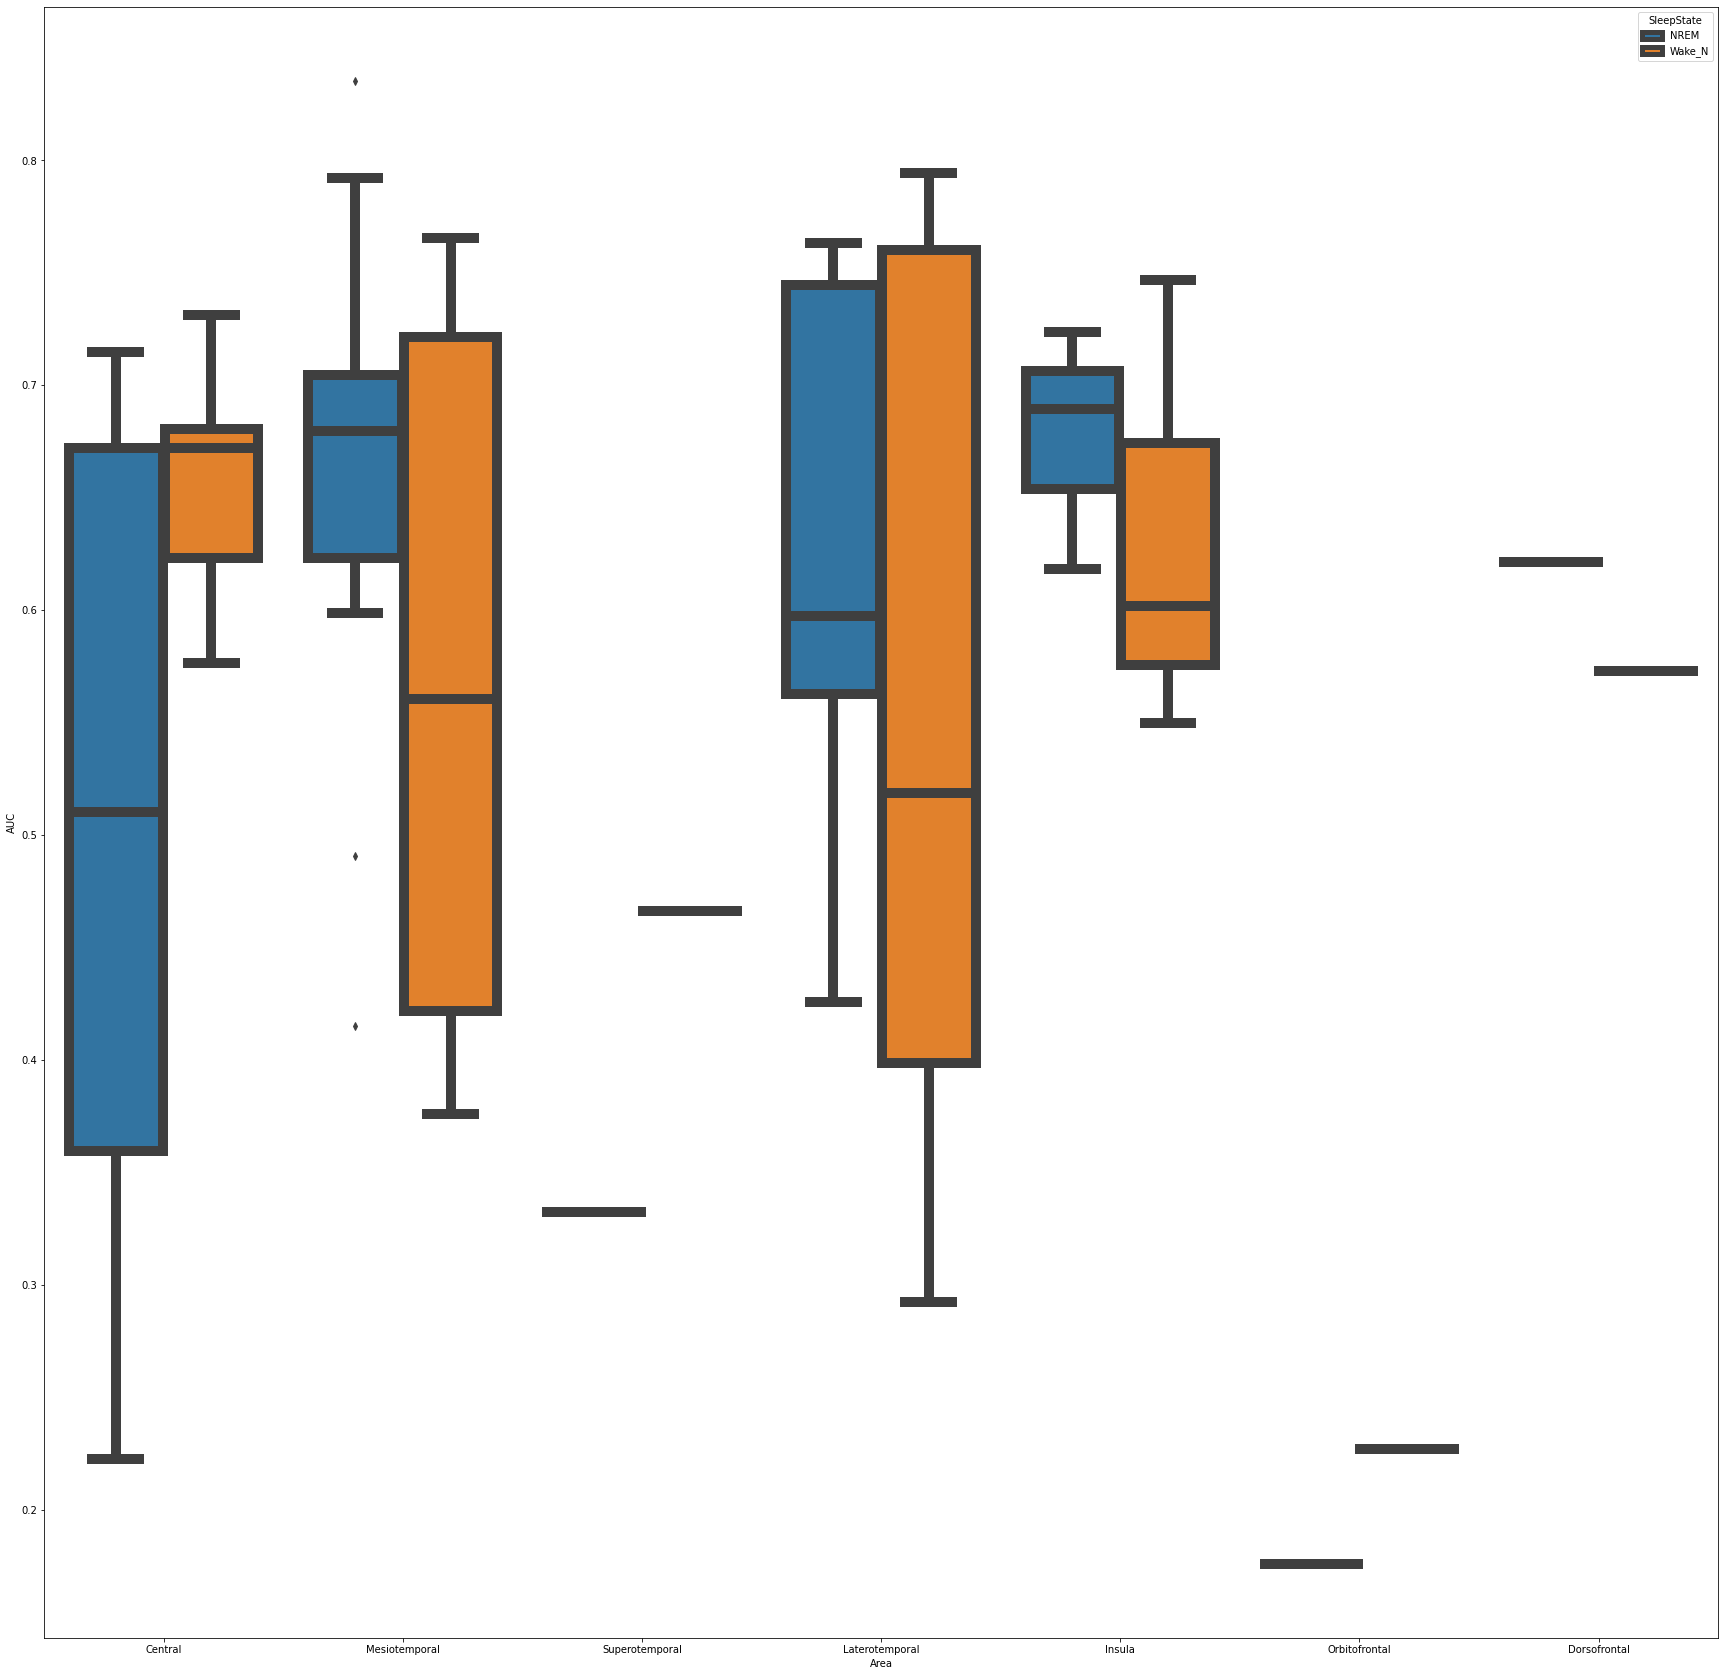

In [170]:
data_plot = data_con[data_con.Pearson>0]
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]
fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
sns.boxplot(x='Area', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)

0.03125


(0.2, 0.9)

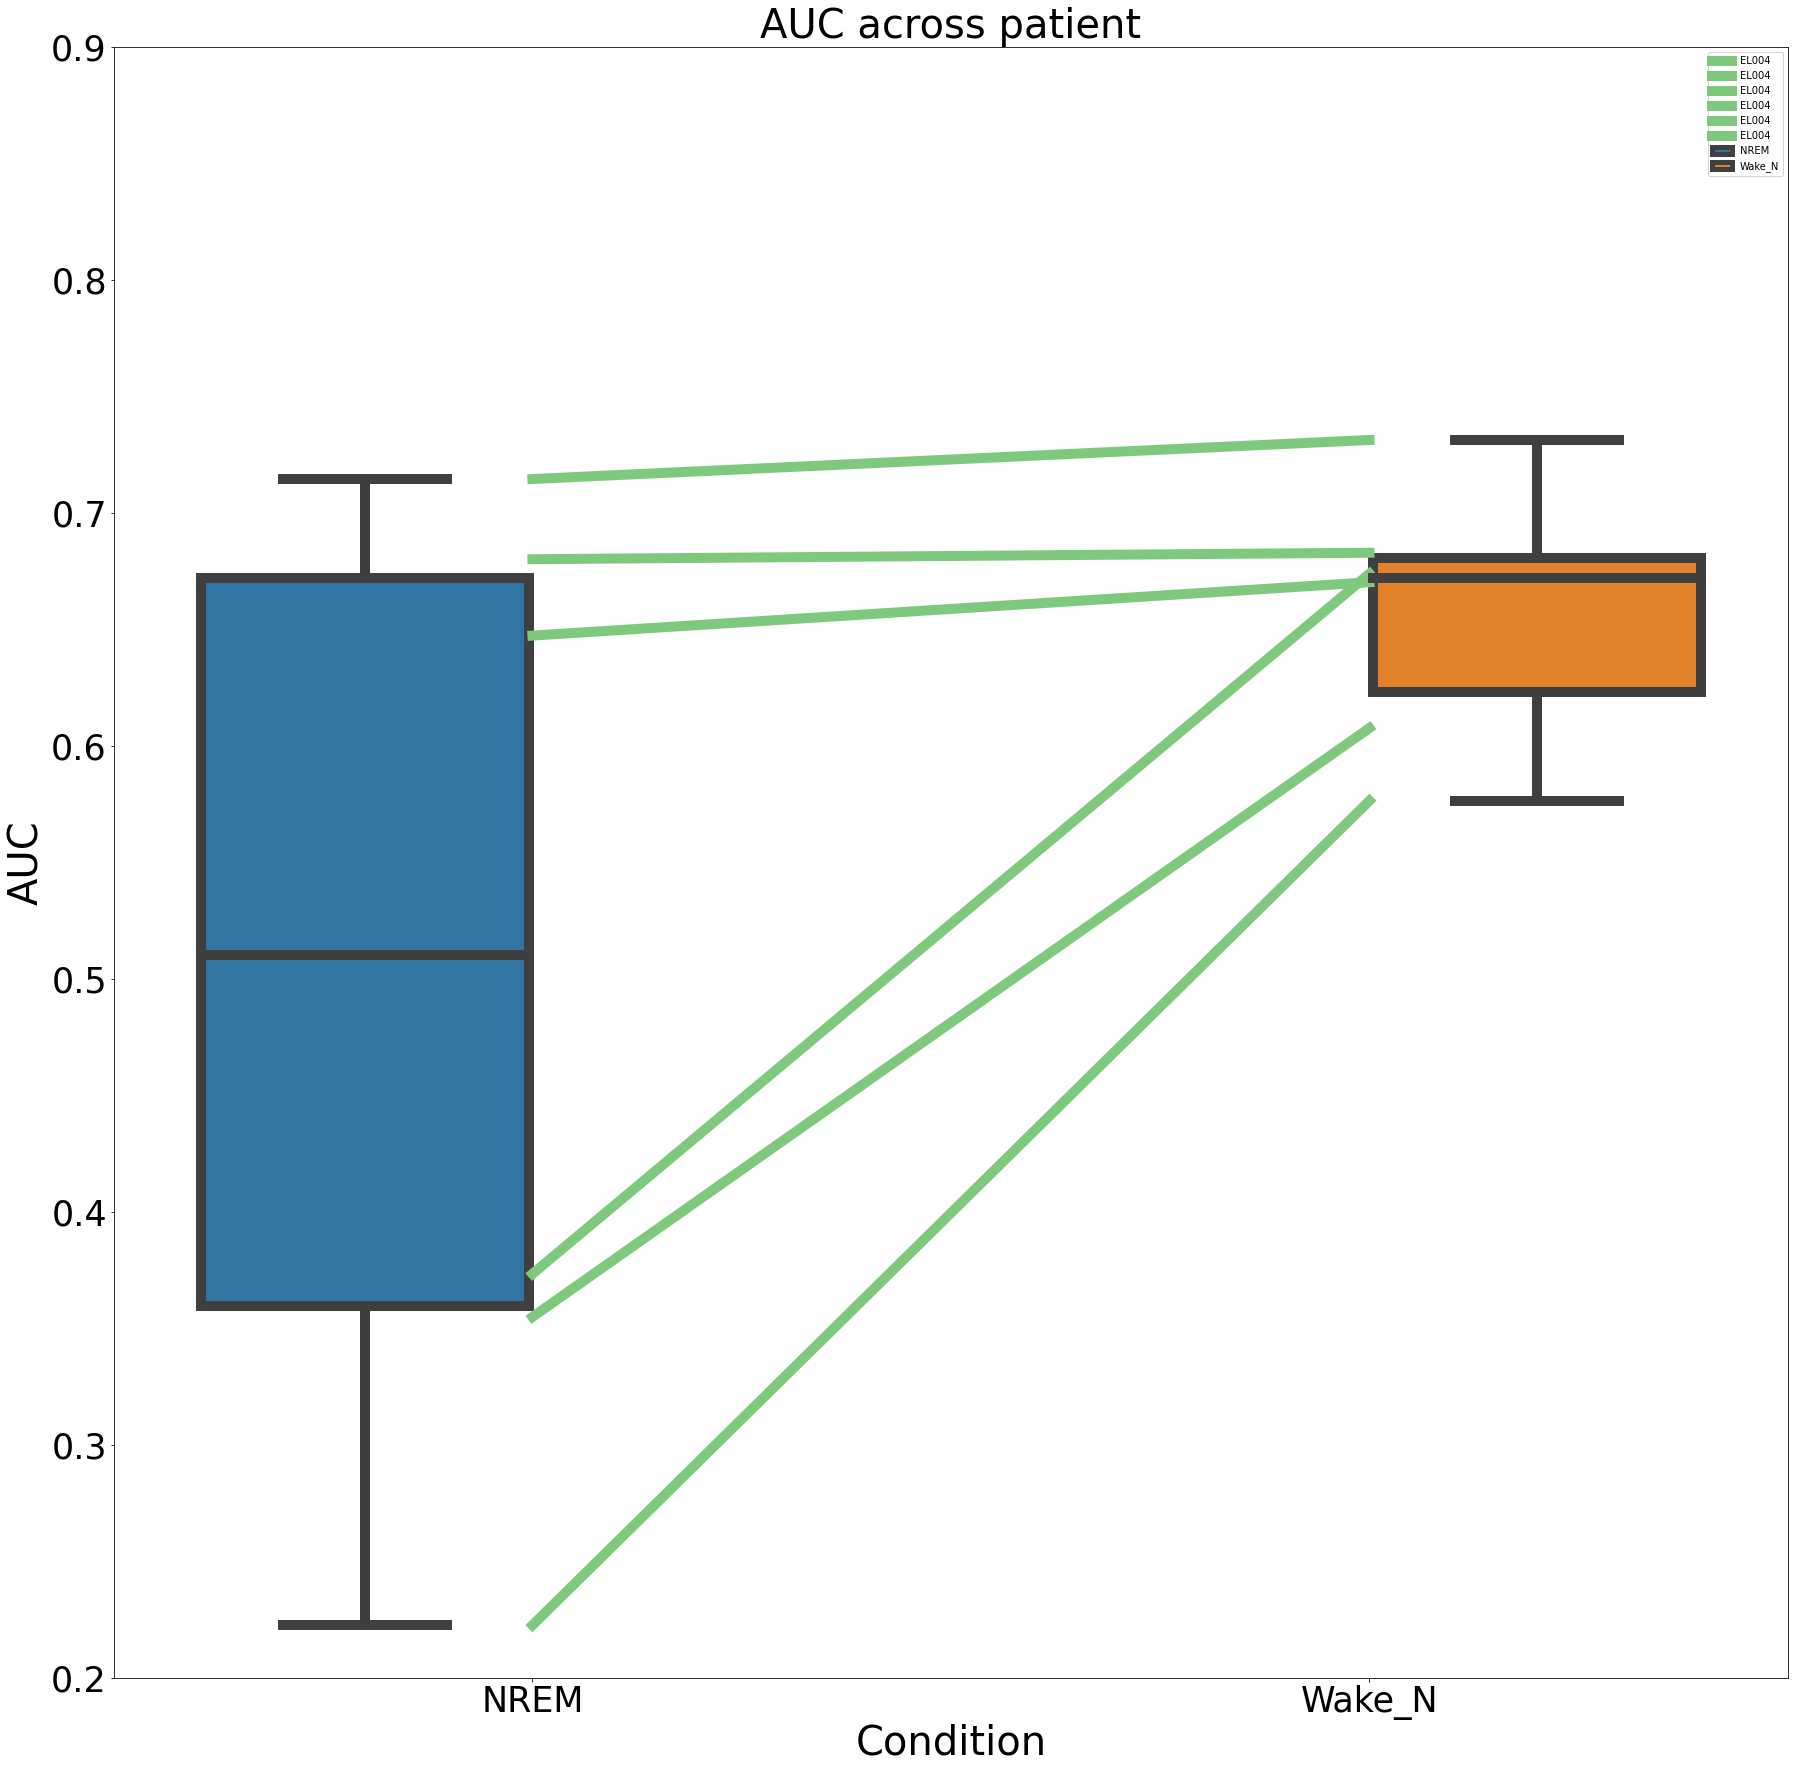

In [171]:
data_plot = data_con[data_con.Area=='Central']
data_plot = data_plot[(data_plot.SleepState=='NREM')|(data_plot.SleepState=='Wake_N')]
w, p = wilcoxon(data_plot.loc[data_plot.SleepState=='NREM', 'AUC'], data_plot.loc[data_plot.SleepState=='Wake_N', 'AUC'])
print(p)

color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_plot.Subj)))

fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
j= 0
for s in np.unique(data_plot.Subj):
    l =0
    for stim in np.unique(data_plot.loc[(data_plot.Subj==s), 'Stim']):
        for h in np.unique(data_plot.loc[(data_plot.Stim==stim)&(data_plot.Subj==s), 'H']):
            dat = data_plot.loc[(data_plot.H==h)&(data_plot.Stim==stim)&(data_plot.Subj==s)]
            # if l ==0:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j], label= s)
            # else:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j])
            plt.plot(dat.SleepState, dat.AUC, linewidth=10, color= color_subj[j], label=s)
            # plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            l = l+1
            
    j = j+1
plt.legend()
plt.xticks([1,3])

ax =sns.boxplot(x='SleepState', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)
# plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
plt.xlabel('Condition', fontsize=40)
plt.ylabel('AUC', fontsize=40)
plt.title('AUC across patient', fontsize=40)
plt.tick_params(axis='both', labelsize=35)
plt.legend()
plt.ylim([0.2,0.9])
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.svg"), transparent=True)
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.jpg"), transparent=True)

(0.2, 0.9)

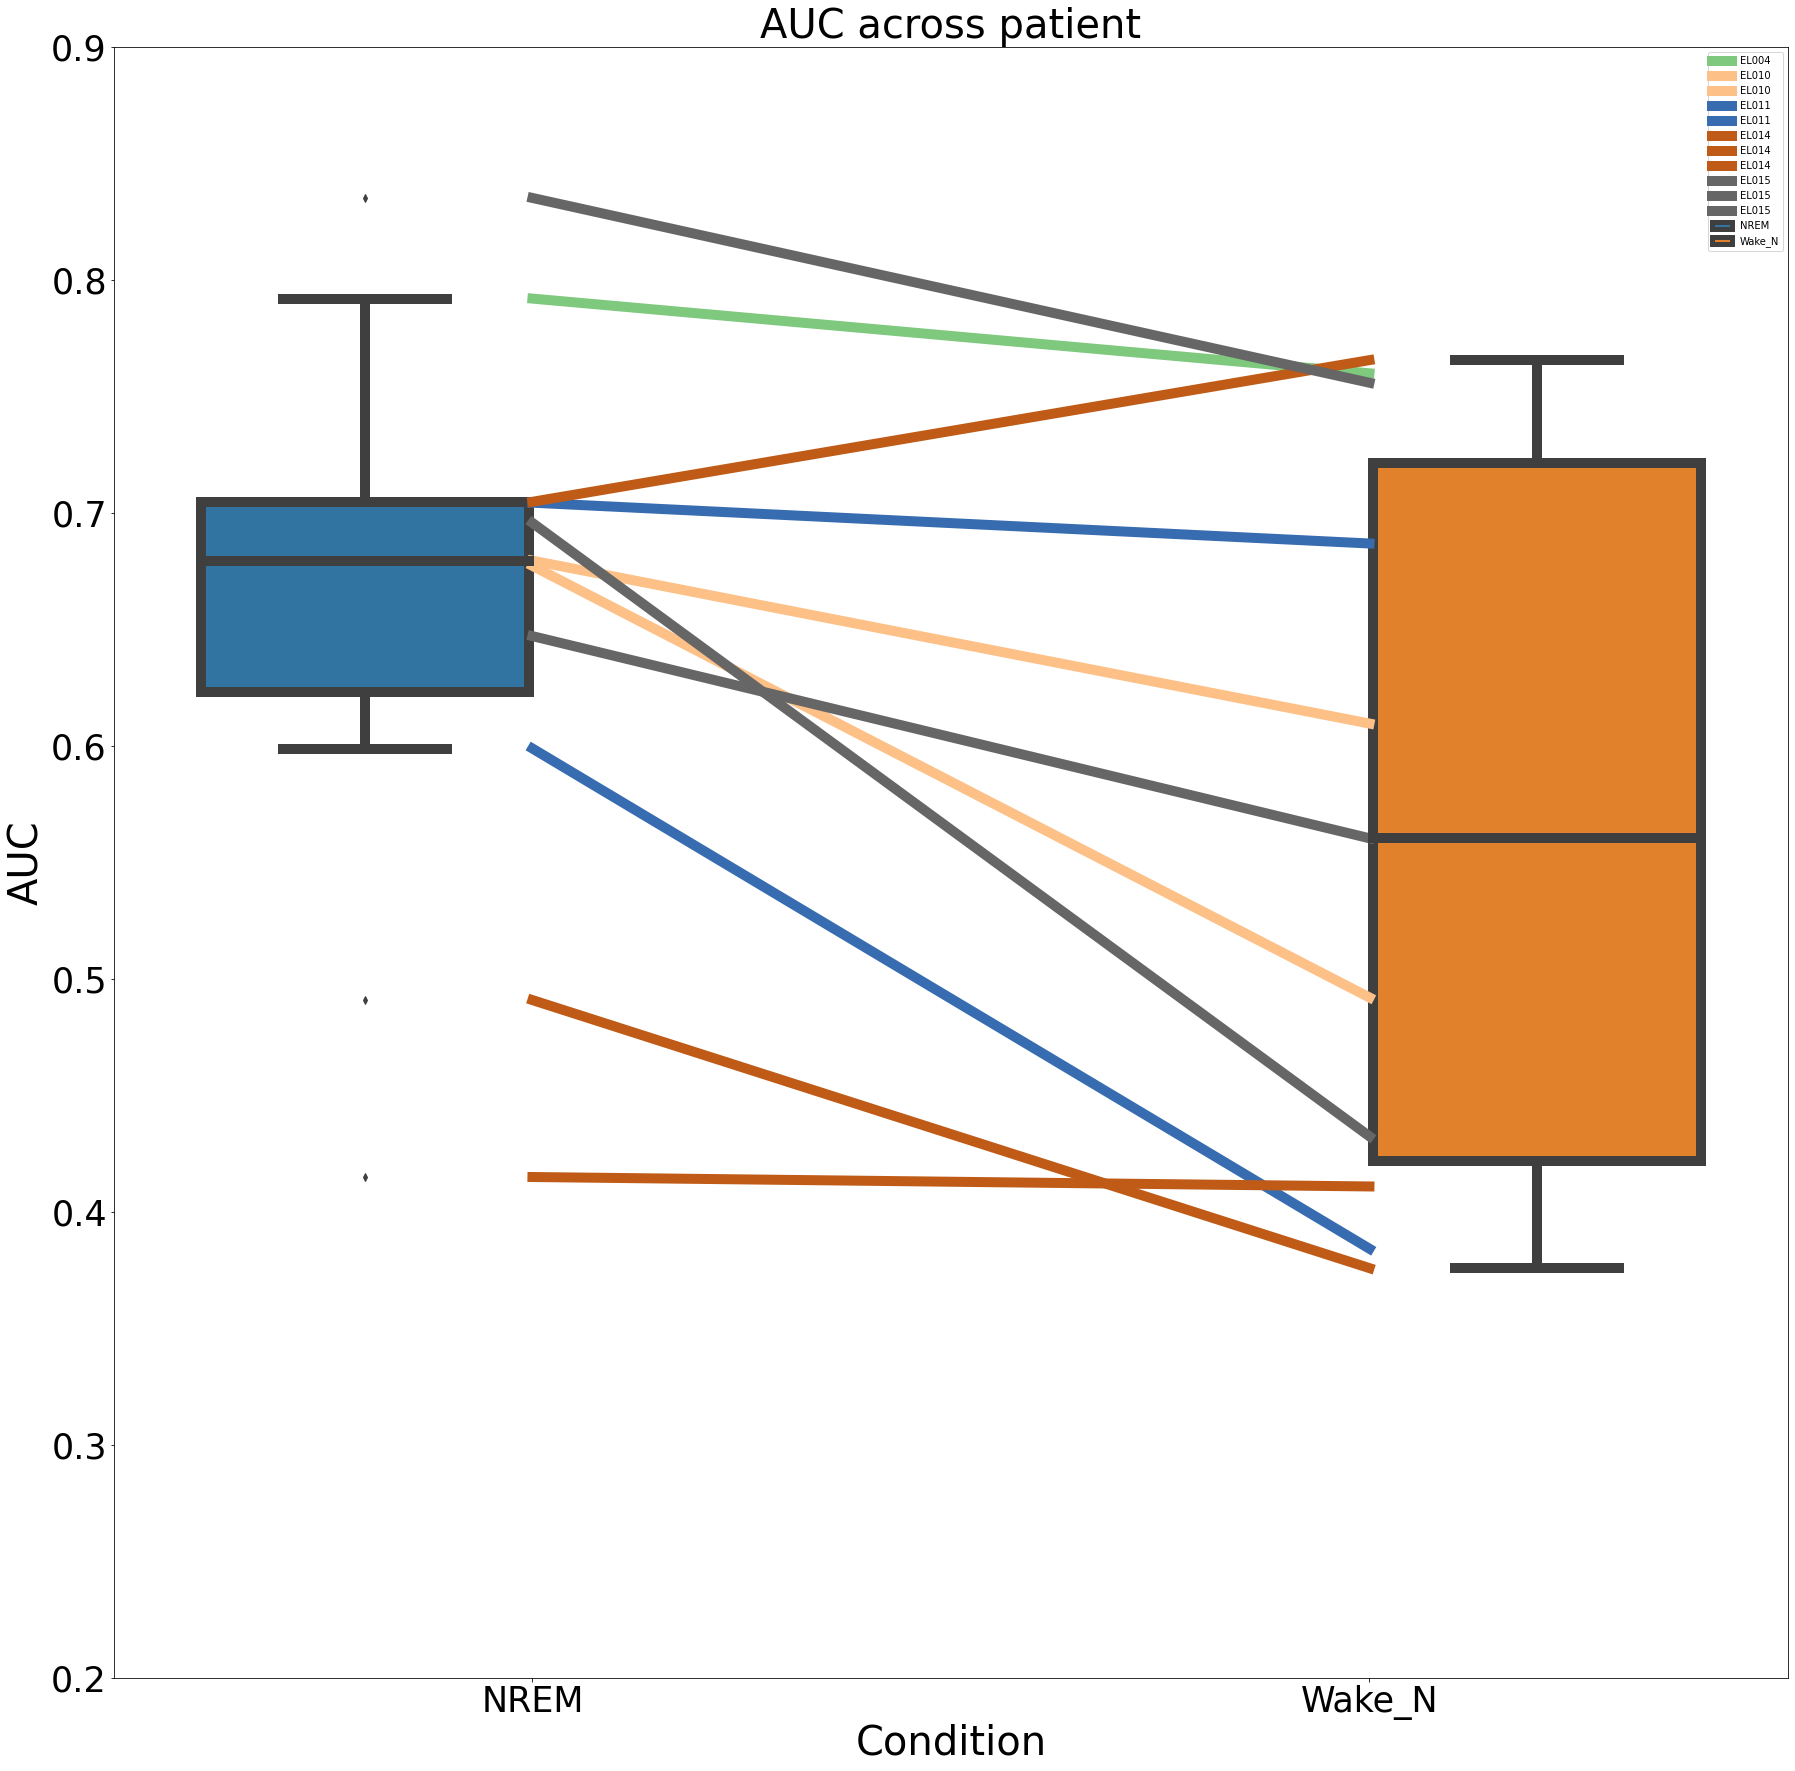

In [152]:
color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_plot.Subj)))

fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
j= 0
for s in np.unique(data_plot.Subj):
    l =0
    for stim in np.unique(data_plot.loc[(data_plot.Subj==s), 'Stim']):
        for h in np.unique(data_plot.loc[(data_plot.Stim==stim)&(data_plot.Subj==s), 'H']):
            dat = data_plot.loc[(data_plot.H==h)&(data_plot.Stim==stim)&(data_plot.Subj==s)]
            # if l ==0:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j], label= s)
            # else:
            #     plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=4, color= color_subj[j])
            plt.plot(dat.SleepState, dat.AUC, linewidth=10, color= color_subj[j], label=s)
            # plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            l = l+1
            
    j = j+1
plt.legend()
plt.xticks([1,3])

ax =sns.boxplot(x='SleepState', y= 'AUC', hue='SleepState', data= data_plot, linewidth= 10)
# plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
plt.xlabel('Condition', fontsize=40)
plt.ylabel('AUC', fontsize=40)
plt.title('AUC across patient', fontsize=40)
plt.tick_params(axis='both', labelsize=35)
plt.legend()
plt.ylim([0.2,0.9])
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.svg"), transparent=True)
#plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.jpg"), transparent=True)

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 2.0)

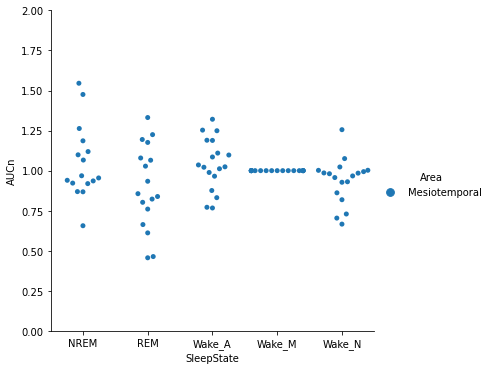

In [9]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con[data_con.Area=='Mesiotemporal'], kind='swarm')
plt.ylim([0,2])

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.

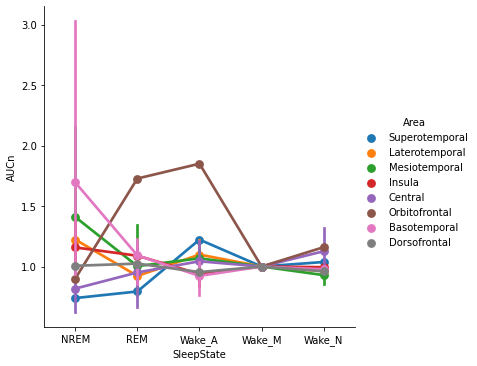

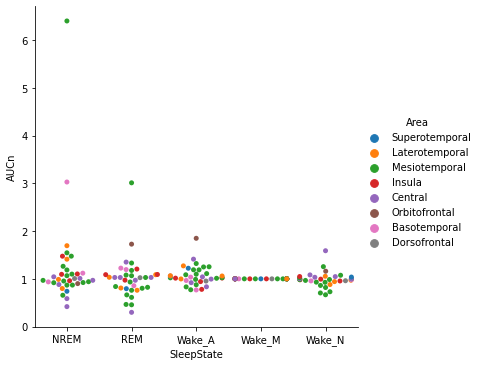

In [263]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='point')
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='swarm')
#plt.ylim([0.5,1.5])

c:\users\i0328442\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


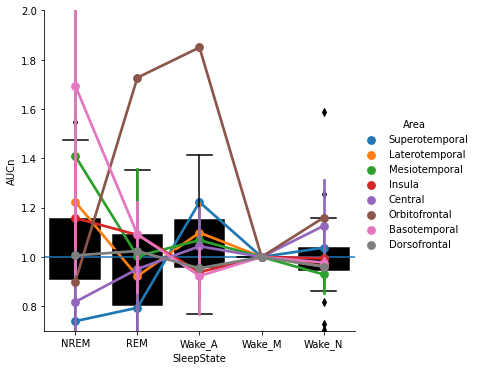

In [258]:
sns.catplot(x='SleepState', y='AUCn',hue='Area',data=data_con, kind='point')
sns.boxplot(data_con.SleepState, data_con.AUCn,color=[0,0,0])
plt.ylim([0.7,2])
plt.axhline(1)

In [ ]:
subjs = ["EL005", "EL004", "EL010", "EL011", "EL013", "EL012", "El014"]
cond_folder  ='CR'
condition = 'Sleep'
## NMF AUC
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # labels
    lbls            = pd.read_excel(path_patient + "/infos/" + subjs[i] + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all      = lbls.label.values
    labels_clinic   = lbls.Clinic.values
    labels_region   = lbls.Region.values
    # load connections
    file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/IO_'+condition+'_AUC_LLpeak_1*.csv')[0]

    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   

In [ ]:
sns.catplot(x='SleepState', y='AUC', hue='Area', data=data_A)

## plots

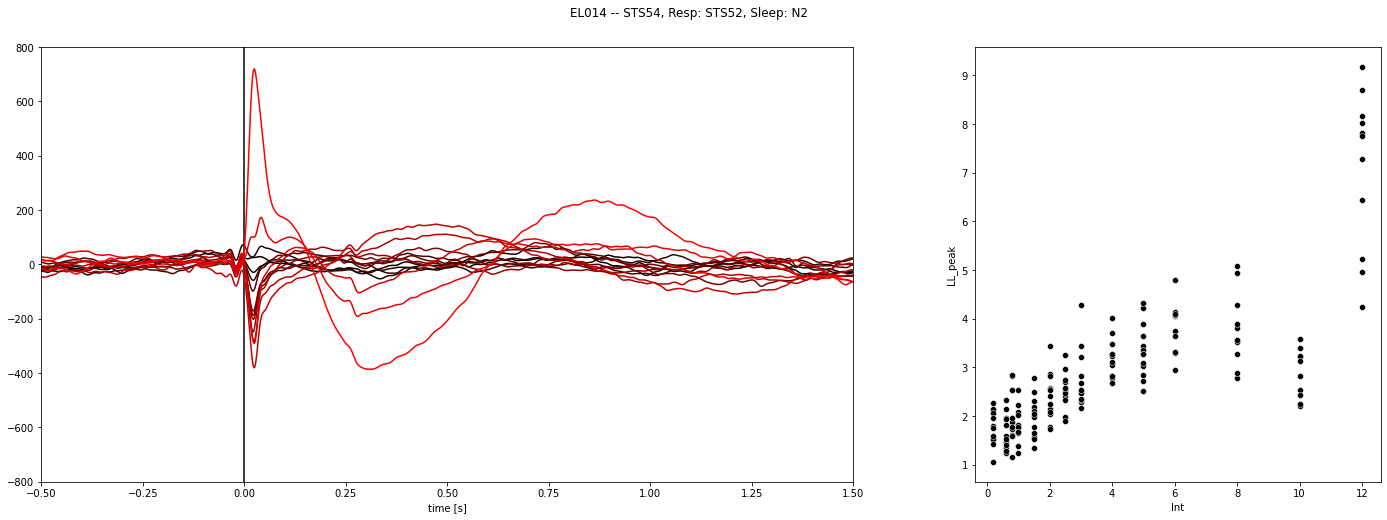

In [55]:
ss = 2
rc = 51
sc = 53
LL_CCEP = con_trial[((con_trial.Hour<9)|(con_trial.Hour>21))&(con_trial.Sleep==ss)]
plot_Ints_IO(sc, rc, LL_CCEP,EEG_resp, labels_all, sleep_labels[ss])

In [51]:
def plot_Ints_IO(sc, rc, LL_CCEP,EEG_resp, labels_all, ss):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(24,8) )
    gs       = fig.add_gridspec(1,2,width_ratios=[2,1])  # GridSpec(4,1, height_ratios=[1,2,1,2])
    plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)]+', Sleep: '+ss , y=0.95)
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    #plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    ax = fig.add_subplot(gs[0,0])
    plt.xlim([-0.5,1.5])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 600
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.min([800, np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1])
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    ax = fig.add_subplot(gs[0,1])
    #sns.set_palette(sns.color_palette(colors_Int))
    sns.scatterplot(x = 'Int', y= 'LL_peak',  data= lists)
    # plt.ylim([0,10])
    plt.show()

## plot some raw responses

In [ ]:
EEG_resp_33 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[0][-11:-4]+'.npy')
EEG_resp_34 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[1][-11:-4]+'.npy')

In [ ]:
EEG_resp = np.concatenate([EEG_resp_33, EEG_resp_34], 1)

In [9]:
sleep_labels = ['W', 'N1', 'N2', 'N3', 'REM']

In [ ]:
stimlist = stimlist.reset_index(drop=True)

In [ ]:
stimlist[(stimlist.ChanP == 59)&(stimlist.sleep == s)]

In [ ]:
sc = 53
rc = 50
s = 4
lists   = LL_CCEP[(LL_CCEP.Sleep == s)&(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
lists          = lists[~np.isnan(lists.LL.values)]
lists

In [ ]:
s = 2
rc = 46
sc = 44
plot_Ints_IO(sc, rc, LL_CCEP[LL_CCEP.Sleep == s],EEG_resp, labels_all, sleep_labels[s])

In [ ]:
colors = ["#FF0B04", "#4374B3"]# Set your custom color palette
sns.set_palette(sns.color_palette(colors_Int))

In [ ]:
def plot_Ints(sc, rc, LL_CCEP,EEG_resp, labels_all):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num_block.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(10,5) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    plt.xlim([-0.6,2])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 600
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num_block.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    plt.show()

# find outliers

In [ ]:
con_trial.to_csv(file_con_trial, index=False, header=True)

In [ ]:
Stims = np.unique(con_trial.Stim)
sc = Stims[0] 
rc = -1


In [ ]:
if  ('zLL' in con_trial.columns):
    con_trial = con_trial.drop(columns= 'zLL')

con_trial.insert(0, 'zLL', 0)

con_trial.zLL = con_trial.groupby(['Stim', 'Chan', 'Int'])['LL_peak'].transform(lambda x: (x - x.mean()) / x.std()).values
con_trial.loc[(con_trial.zLL > 3.5), 'LL'] = np.nan
con_trial.loc[(con_trial.zLL < -3), 'LL'] = np.nan
#con_trial = con_trial.drop(columns='zLL')
con_trial.loc[np.isnan(con_trial.LL), 'LL_peak'] = np.nan

In [ ]:
rc = rc-2

In [ ]:
rc = rc+1
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='LL_peak', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='zLL', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

In [ ]:
rc=-1

In [ ]:
rc = rc+1
plt.figure(figsize=(8,8))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='LL_peak', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
# plot_IO(sc, rc, con_trial_block,EEG_resp,labels_all)
plt.title(labels_all[int(sc)]+'--' +labels_all[rc])
sns.scatterplot(x='Int', y='zLL', data= con_trial[(con_trial.LL>0)&(con_trial.Stim==sc)&(con_trial.Chan==rc)])
plt.show()

### normalize

In [ ]:
badchans = pd.read_csv(path_patient + '/Analysis/InputOutput/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(badchans.values[:, 1:] == 1))[0, :])
bad_chans = np.where(np.mean(badchans.values[:, 1:],1)>0.3)[0]

## NNMF

In [ ]:
CR_color_a = CR_color.a.values
CR_color = CR_color.c.values
CR_color = np.zeros((24,3))
CR_color[6:18,:] =np.array([253, 184, 19 ])/255
CR_labels = []
for i in range(24):
    CR_labels.append(f"{i:02}"+":00")

In [ ]:
cond = 'Block'

In [ ]:
file = glob(path_patient + '/Analysis/' + folder + '/'+cond_folder+'/NNMF/IO_'+cond+'_AUC_LLpeak_1*.csv')
CR_NMF_AUC = pd.read_csv(file[0])

In [ ]:
CR_NMF_AUC

In [ ]:
CR_NMF_AUC = CR_NMF_AUC[CR_NMF_AUC.Pearson>0]

In [ ]:
#CR_NMF_AUC.loc[(CR_NMF_AUC.H==6)&(CR_NMF_AUC.Stim!=7), 'Pearson'] = 0

In [ ]:
CR_NMF_AUC = CR_NMF_AUC[CR_NMF_AUC.Pearson>0.5]

In [ ]:
CR_NMF_AUC[(CR_NMF_AUC.H==2)&(CR_NMF_AUC.AUC>0.675)]

In [ ]:
h_all

In [ ]:
# load hypnogram
file_hypno = path_patient + '/Analysis/stimlist_hypnogram.csv'
if os.path.isfile(file_hypno):
    stimlist_hypno = pd.read_csv(file_hypno)
    
#add chornologic hours for plotting
#stimlist_hypno.insert(0, 'ix_chron', 0)
for d in range(len(np.unique(stimlist_hypno.date))):
    stimlist_hypno.loc[stimlist_hypno.date == np.unique(stimlist_hypno.date)[d],'ix_chron']= stimlist_hypno.loc[stimlist_hypno.date == np.unique(stimlist_hypno.date)[d],'ix_h']+d*24
    
NNMF_AUC.insert(1,'H_chron', 0)
NNMF_AUC['H_chron'] = NNMF_AUC['Hour']+24*NNMF_AUC['Day']    


##hypnogram ticks
h_0  = np.floor(np.min(stimlist_hypno.ix_chron))
h_end = np.ceil(np.max(stimlist_hypno.ix_chron))
xt = np.arange(h_0, h_end,np.floor((h_end-h_0)/5))
xl = []
for i in range(len(xt)):
    x_raw = xt[i].astype('int')
    while x_raw>23:
        x_raw = x_raw-24
    xl.append(f"{x_raw:02}"+":00")
    
block = np.unique(NNMF_AUC.Block)

In [ ]:
h_all = np.unique(CR_NMF_AUC.H)
for h in h_all:
    AUC_plot = CR_NMF_AUC[CR_NMF_AUC.H==h]
    plt.figure(figsize=(10,2))
    plt.title(subj+' -- '+labels_all[AUC_plot.Stim.values[0].astype('int')])
    plt.axhline(np.mean(AUC_plot.AUC), color = [0,0,0], alpha=0.5)
    plt.plot(AUC_plot.Block, AUC_plot.AUC, linewidth=3)
    #plt.scatter(AUC_plot.Block, AUC_plot.AUC)
    

In [ ]:
CR_NMF_AUC

In [ ]:
fig      = plt.figure(figsize=(15,15), facecolor='w', edgecolor='k')
gs       = fig.add_gridspec(2,1)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle(subj+' -- '+labels_all[np.int64(sc)]+', Resp: '+labels_all[np.int64(rc)], y=0.95)

ax = fig.add_subplot(gs[0,0])
for i in range(len(StimNum)):
    plt.plot(x_ax, EEG_resp[rc, StimNum[i],:],0)
plt.axvline(0, c=[0,0,0])
fig.add_subplot(gs[1,0], sharex=ax)
for i in range(len(StimNum)):
    plt.plot(x_ax_LL, LL_trial[rc, StimNum[i],:],0)
#plt.xlim([-0.2, 0.5])
plt.axvline(0, c=[0,0,0])
plt.axvline(w/2, c=[0,0,0])

## test IO for specific block

In [ ]:
files_list

In [ ]:
l =33
print('loading '+files_list[l][-11:-4], end='\r')
stimlist33 = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist33.columns):
    stimlist33.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist33.StimNum= np.arange(len(stimlist))  
EEG_resp33 = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block33 = pd.read_csv(file)

In [ ]:
l =22
print('loading '+files_list[l][-11:-4], end='\r')
stimlist = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist.columns):
    stimlist.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist.StimNum= np.arange(len(stimlist))  
EEG_resp = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block = pd.read_csv(file)

In [ ]:
l =22
print('loading '+files_list[l][-11:-4], end='\r')
stimlist = pd.read_csv(files_list[l])
if not ('StimNum' in stimlist.columns):
    stimlist.insert(5,'StimNum',np.arange(len(stimlist) ))
else:
    stimlist.StimNum= np.arange(len(stimlist))  
EEG_resp = np.load(path_patient + '/Analysis/' + folder + '/data/ALL_resps_'+files_list[l][-11:-4]+'.npy')

block_l = files_list[l][-11:-4]
file = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial'+block_l+'.csv'
con_trial_block = pd.read_csv(file)

In [ ]:
con_trial_block33

In [ ]:
con_trial_block

In [ ]:
sc = 5
rc = 0
plot_Ints(sc, rc, con_trial_block33,EEG_resp33, labels_all)
plot_Ints(sc, rc, con_trial_block,EEG_resp, labels_all)

In [ ]:
plot_Ints(sc, rc, con_trial_block,EEG_resp, labels_all)

In [ ]:
def plot_Ints(sc, rc, LL_CCEP,EEG_resp, labels_all):
    lists   = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]#&(LL_CCEP['Int']==Int)
    lists          = lists[~np.isnan(lists.LL.values)]
    stimNum_all    = lists.Num_block.values.astype('int')
    Int_all = np.unique(lists.Int)
    colors_Int = np.zeros((len(Int_all), 3))
    colors_Int[:, 0] = np.linspace(0, 1, len(Int_all))
    fig   = plt.figure(figsize=(10,5) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc])#+', Dist: '+str(np.round(lists.d.values[0]))+'mm'
    plt.xlim([-0.6,2])
    
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    limy = 300
    for i in range(len(Int_all)):
        list_Int = lists[lists.Int==Int_all[i]]
        stimNum_all                  = list_Int.Num_block.values.astype('int')
        plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=colors_Int[i], linewidth=1.5)
        lim= np.max(abs(np.mean(EEG_resp[rc,stimNum_all,:],0)))*1.1
        limy = np.max([limy, lim])
    plt.ylim([-limy,limy])
    plt.show()